In [1]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import ptitprince as pt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
plot_info = []
src_data_dir = "../utils/multi-gen-result"

for root, sub_dir, files in os.walk(src_data_dir):
    for file in files:
        if file.endswith(".csv"):
            try:
                src_file = os.path.join(root,file)
                dim = int(file[3])
                obj = int(file[9])
                tree = file[16:].strip(".csv").split("_")[0]
                gen = int(file.strip(".csv")[-3:])
                df = pd.read_csv(src_file,index_col=0).fillna(0)
                df["dimension"] = dim
                df["n_objectives"] = obj
                df["tree"] = tree
                df["gen"] = gen
                plot_info.append(df)
            except Exception as e:
                pass

In [3]:
new_df = pd.concat(plot_info,ignore_index=True)

In [4]:
new_df

,solver,exp_index,root,node_1,node_2,node_3,node_4,dimension,n_objectives,tree,gen
0,MOEAD,24933.0,99.0,0.0,0.0,1.0,0.0,3,4,breadth,900
1,MOEAD,24934.0,99.0,0.0,0.0,0.0,1.0,3,4,breadth,900
2,MOEAD,24935.0,99.0,0.0,1.0,0.0,0.0,3,4,breadth,900
3,MOEAD,24936.0,98.0,2.0,0.0,0.0,0.0,3,4,breadth,900
4,MOEAD,24937.0,99.0,0.0,0.0,1.0,0.0,3,4,breadth,900
...,...,...,...,...,...,...,...,...,...,...,...
594607,IBEA,27031.0,92.0,0.0,0.0,0.0,8.0,2,5,breadth,300
594608,IBEA,27032.0,84.0,0.0,0.0,0.0,16.0,2,5,breadth,300
594609,IBEA,27033.0,91.0,3.0,6.0,0.0,0.0,2,5,breadth,300
594610,IBEA,27034.0,77.0,0.0,0.0,2.0,21.0,2,5,breadth,300


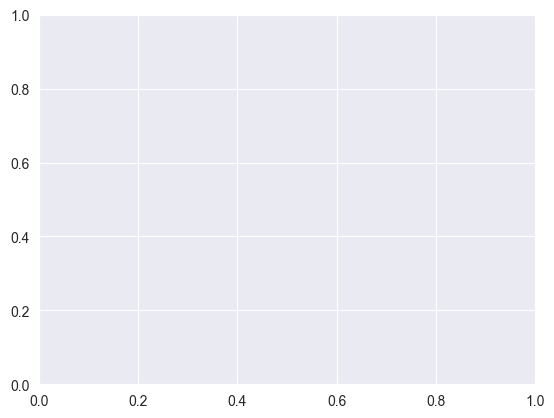

In [7]:
# Mass plot
agg_dim = 6
for solver in ["GDE3", "NSGAII","IBEA", "MOEAD"]:
    for tree in ["breadth", "depth"]:
        for gen in range(1,10):
            filtered_dfs = []
            for n_objectives in [2,3,4,5]:
                dimension = agg_dim - n_objectives + 1
                filtered_dfs.append(
                    new_df[(new_df["solver"]==solver) & (new_df["dimension"]==dimension)&(new_df["tree"]==tree)&(new_df["n_objectives"]==n_objectives)&(new_df["gen"]==gen*100)]
                )
                
            filtered_df = pd.concat(filtered_dfs)
    
            if solver == "MOEAD":
                solver_name = "MOEA/D"
            elif solver == "NSGAII":
                solver_name = "NSGA-II"
            else:
                solver_name = solver
    
            fig, axs = plt.subplots(1, 4, figsize=(12, 3),dpi=600)
            fig.suptitle(f"Distribution of {solver_name}'s sampling points under {tree} connectivity $\operatorname{{dim}}X={agg_dim}$ at {gen*100}-th Generation",fontsize=18)
            fig.tight_layout(pad=2,w_pad=4,h_pad=5)
            width = 0.6
            colors = ["#8fdea0","#ec80b4", "#eed5a4","#9a97dc","#d7e7f5"]
            palette = sns.color_palette(colors)
    
            for n_objective, sub_df in filtered_df.groupby("n_objectives"):
                sub_results = []
                for sub_index, row in sub_df.iterrows():
                    sub_results.append({"node_name": "root", "percentage": row["root"]})
                    sub_results.append({"node_name": "1", "percentage": row["node_1"]})
                    sub_results.append({"node_name": "2", "percentage": row["node_2"]})
                    sub_results.append({"node_name": "3", "percentage": row["node_3"]})
                    sub_results.append({"node_name": "4", "percentage": row["node_4"]})
                sub_results = pd.DataFrame(sub_results)
                plt.subplot(1,4,n_objective-1)
                plt.title(f"N objectives = {n_objective}", fontsize=16)
                # pt.RainCloud(x="day", y="total_bill", data=tips, orient="v")
                # axs[plot_row,plot_col].set_xlabel("Basin name")
                # axs[plot_row,plot_col].set_ylabel("Percentage of solver instances")
                # axs[plot_row,plot_col].set_ylim([-5, 105])
    
                plt.ylim([-5,105])
                # plt.grid(visible=False)
                pt.RainCloud(data=sub_results, x="node_name", y="percentage", orient="v", width_viol=0.9,linewidth=0.1,point_size=3,
                        rain_edgecolor='black', rain_linewidth=0.5, rain_alpha=1,move = 0.15,width_box=0,box_linewidth=0,offset=-0.0,pointplot=True, point_linestyles='', point_scale=0.3, palette=palette)
                plt.xlabel("Basin ID", fontsize=16)
                plt.ylabel("Percentage (%)", fontsize=16)
                plt.xticks(fontsize=14)
                plt.yticks(fontsize=14)
            plt.savefig(f"plot_1010/mass_{solver}_{tree}_gen{gen*100}.pdf", format="pdf", bbox_inches="tight")
            plt.savefig(f"plot_1010/mass_{solver}_{tree}_gen{gen*100}.png")
            plt.close('all')  # Closes all open figures
            plt.clf()  # Clears the current figure (if one exists)
            plt.cla()  # Clears the current axes (if any exist)